In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
# Load Data
data_metrics = np.load('Outputs/T1_metrics.npy')
data_Spks = np.load('Outputs/T1_Spks.npy', allow_pickle=True)
data_Spks_tot = np.load('Outputs/T1_Spks_tot.npy')
data_Mems = np.load('Outputs/T1_Mems.npy', allow_pickle=True)
data_Mems_tot = np.load('Outputs/T1_Mems_tot.npy')

# Compute the Sum over the 3 Layers of the Spikes and Mem Potential
data_Spks_tot_tot = np.sum(data_Spks_tot, axis=1)
data_Mems_tot_tot = np.sum(data_Mems_tot, axis=1)

In [ ]:
# Prints
# print(np.array(data_Spks.item().get('s1')[0]))
# print(data_Spks_tot)
print(data_metrics[0][2])

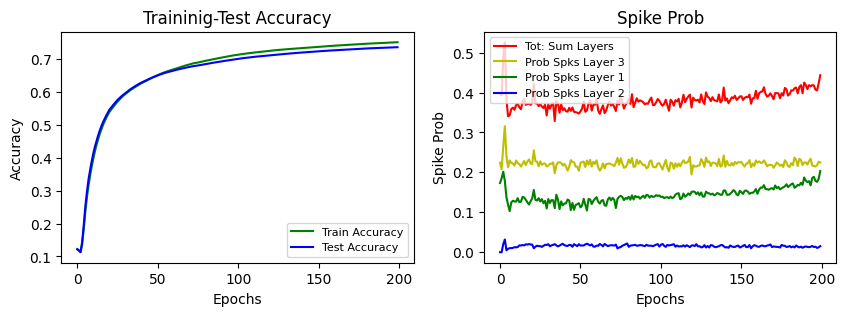

In [114]:
# Plots
epochs = range(0, len(data_metrics[0][0]))

fig, axes = plt.subplots(1,2, figsize=(10,3))

axes[0].plot(epochs, data_metrics[0][2], 'g', label='Train Accuracy')
axes[0].plot(epochs, data_metrics[0][3], 'b', label='Test Accuracy')
axes[1].plot(epochs, data_Spks_tot_tot, 'r', label='Tot: Sum Layers')
axes[1].plot(epochs, data_Spks_tot[:,2], 'y', label='Prob Spks Layer 3')
axes[1].plot(epochs, data_Spks_tot[:,0], 'g', label='Prob Spks Layer 1')
axes[1].plot(epochs, data_Spks_tot[:,1], 'b', label='Prob Spks Layer 2')

axes[0].set_title('Traininig-Test Accuracy')
axes[1].set_title('Spike Prob')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Spike Prob')

axes[0].legend(fontsize=8)
axes[1].legend(fontsize=8)
plt.show()